# Using Python to Plot Stereonets

An instructional notebook and part of [fractoolbox] (https://github.com/ICWallis/fractoolbox)

Made by Irene Wallis: [Researcher](https://unidirectory.auckland.ac.nz/profile/i-wallis) and [consulting geoscientist](https://www.cubicearth.nz/)

In [9]:
import fractoolbox as ftb
# ensure fractoolbox.py is in the same directory as this notebook

import numpy as np
import pandas as pd
import mplstereonet as mpls
import matplotlib.pyplot as plt
%matplotlib inline

# Understanding Stereonets

There are two common types of stereonets and the one you use depends on both discipline convention. Projecting data onto a stereonet plot will generate distortion, so which type of stereonet you use also depends on if you want to preserve area or angular relationships.

1) Equal area Schmidt (Lambert) net:

- Preserves area and uses a [Lambert azimuthal equal-area projection](https://en.wikipedia.org/wiki/Lambert_azimuthal_equal-area_projection)
- Ideal ideal for visualising clustering relationships between plotted data (best for contoured data)
- Typically used in structural geology 

2) Equal angle Wulff net:

- Preserves angle and uses a [Stereographic Equal-Angle Projection](https://en.wikipedia.org/wiki/Stereographic_projection#Wulff_net)
- Typically used in crystallography

Stereonets may either be lower hemisphere (typical in structural geology) or upper hemisphere (typical in earthquake seismology). 
 
This notebook uses the [lower hemisphere, equal area stereonet](https://www.youtube.com/watch?v=kIj_0VxSw8w) unless otherwise indicated.

# Plotting Stereonets with Python

The [Stereonets for Matplolib library \(mplstereonet\)](https://github.com/joferkington/mplstereonet) can be used to generate stereonets in Python. This library also generates contour plots and has tools to parse structural data. The documentation has a range of [excellent examples](https://github.com/joferkington/mplstereonet/tree/master/examples) that I recommend browsing.  

Mplstereonet expects data in a strike-dip format where the right hand rule is followed. This means that if you place your right hand on the plane with your fingers pointing down-dip (dip azimuth), your thumb points in the direction of the strike azimuth. Below are examples with the right hand rule applied:

- 025/50W becomes strike 205 and dip 50, where 180 was added to the strike because the plane dips west 
- 090/20E becomes strike 90 and dip 20, were the strike remains the same because the plane dips east 

### Stereonet projection types in mplstereonet

The code block below illustrates how to call the different stereonet types using mplstereonet.

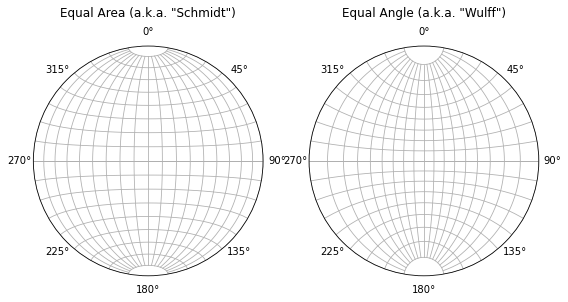

In [10]:
fig = plt.figure(figsize=(14,5)) 

ax1 = fig.add_subplot(1,3,2, projection= 'equal_area_stereonet') 
# projection = projection= 'stereonet' will also created an equal area stereonet

ax2 = fig.add_subplot(1,3,3, projection= 'equal_angle_stereonet')

for ax in [ax1,ax2]:
    ax.grid()
    
ax1.set_title('Equal Area (a.k.a. "Schmidt")',y=1.1)
ax2.set_title('Equal Angle (a.k.a. "Wulff")', y=1.1)

plt.show() 

## Plotting a Plane (fault, fracture, bed etc)

A plane is described by strike and dip where:

- Strike is the azumuth in degrees of a horozontal line on the plane
- Dip is the inclnation in degrees of the plane dowanward from a horozontal and measured perpendicular to strike

A 'pole' is the vector that is normal to the plane and, because a single point fully describes the geometry of the plane, poles are a useful plotting tool when there is large quanties of data. [This video](https://www.youtube.com/watch?v=qlB16u7znLM&list=PL_pLrb0qXSy7OSVrtX8Dq_ZCvlrmnBNJ-&index=10) includes a demostration for how to plot a pole on a stereonet by hand.

Refer to [this youtube channel](https://www.youtube.com/channel/UC9lm0QJcFCjPw7dGopVtwRQ) for excellent videos on how to draw stereonets by hand.

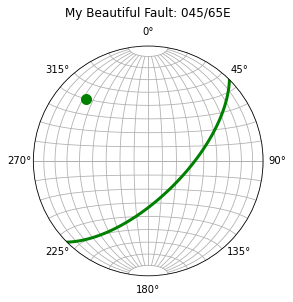

In [11]:
strike = 45
dip = 65

fig = plt.figure(figsize=(14,5)) 

ax = fig.add_subplot(1,3,2, projection= 'equal_area_stereonet')

# plot the great circle
ax.plane(strike, dip,'-',color='g',linewidth=3)

# below is a version with default formatting
#ax.plane(strike, dip)

# plot the pole
ax.pole(strike, dip,'o',color='g',markersize=10)

ax.grid()
    
ax.set_title('My Beautiful Fault: 045/65E',y=1.1)

plt.show() 

## Plotting a Line

Lines are defined by trend and plunge where:

- Trend is the azimuthal direction of the line in degrees (0-360)
- Plunge is the inclination of that line in degrees measured from a horizontal plane (0-90)

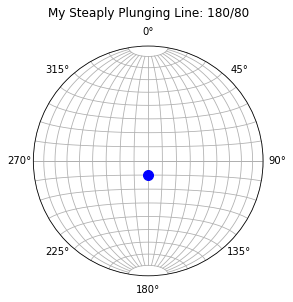

In [12]:
azimuth = 180
plunge = 80

fig = plt.figure(figsize=(14,5)) 

ax = fig.add_subplot(1,3,2, projection= 'equal_area_stereonet')

# plot the line
ax.line(plunge, azimuth,'o',color='b',markersize=10)

ax.grid()
    
ax.set_title('My Steaply Plunging Line: 180/80',y=1.1)

plt.show() 

## Plotting Lines in Reference to a Plane 

A line that lies in a plane may be called the rake or pitch of that plane. These lines may be striations or scratch marks on a fault plane that describe the sense of movement on that fault. The rake is described by the acute angle it forms with the strike line and the direction from which that angle is measured. Refer to [this video](https://www.youtube.com/watch?v=kX9f6JQmsps) for an illustration of how to describe a rake and plot it by hand on a stereonet.

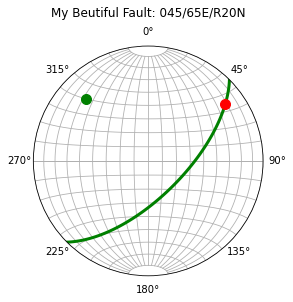

In [13]:
# in mplstereonet, the rake value must reference to north
# for the fault 045/65E/R20N, rake = 20
# for the fault 030/60E/R30S, rake = 180 - 30 

strike = 45
dip = 65
rake = 20 

fig = plt.figure(figsize=(14,5)) 

ax = fig.add_subplot(1,3,2, projection= 'equal_area_stereonet')

# plot the great circle
ax.plane(strike, dip,'-',color='g',linewidth=3)

# plot the pole
ax.pole(strike, dip,'o',color='g',markersize=10)

# plot the rake
ax.rake(strike, dip, rake, 'o',color='r',markersize=10)

ax.grid()
    
ax.set_title('My Beutiful Fault: 045/65E/R20N',y=1.1)

plt.show() 

## Finding the Line that Describes an Intersection of Two Planes

Where two planes intersect, they form a line, and you can determine the trend and plunge of that line using a stereonet. [This video](https://www.youtube.com/watch?v=ifhdyRwGXQ4&list=PL_pLrb0qXSy7OSVrtX8Dq_ZCvlrmnBNJ-&index=7) illustrates the method by hand.

Finding the intersection line define the line where an unconformity and fault intersect, where both are planar and have known orientations, as this may represent a target zone for minerals exploration. 

In [14]:
# Code to come

## Contouring Structural Data

A lower hemisphere, equal area Schmidt (Lambert) net is the best projection to use for statistical analysis and contouring. 

By default, the contour method in mplstereonet is Kamb with exponential smoothing (see Vollmer, 1995). Refer to the mplstereonet docs for info on other methods of contouring.

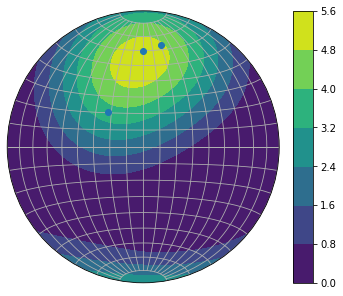

In [15]:
# below illustrates a different method for 
# generating the plot container compared with
# above, but the result is the same

fig, ax = mpls.subplots(1,1,constrained_layout=True)

strike=[45,90,100] 
dip=[30,60,65]

cax = ax.density_contourf(strike, dip, measurement='poles') 

ax.pole(strike, dip)
ax.grid(True)
ax.set_azimuth_ticklabels([])

# add the colour bar
fig.colorbar(cax) 

plt.show()

# Plotting Image Log Data

Typically, the analysis of downhole image logs (e.g., micro-resistivity or acoustic borehole images) generates dip, dip azimuth data. This format can not be passed directly into mplstereonet so I've provided a function that calculates strike from the dip, dip azimuth using the right hand rule.

In [16]:
dipaz = 95   # dip azimuth of the fracture
dip = 45     # dip of the fracture

strike = ftb.dip2strike(dipaz,dip)

print('strike =',strike,'dip =', dip)

strike = 5 dip = 45


If there is large amount of fracture data, as would be the case from image log analysis, I recommend using [Pandas](https://pandas.pydata.org/). The method below illustrates how Pandas may be used.

In [17]:
dipazs = [0,90,180,300] # dip azimuth
dips = [5,20,40,60]     # dip

# turn the lists into a Pandas dataframe
df = pd.DataFrame(list(zip(dipazs,dips)),columns = ['dipaz','dip']) 

# if you have a csv file of fracture data then 
# use the pandas.read_csv() method to make a dataframe

# calculate strike and add to dataframe
df['strike'] = [ftb.dip2strike(x, y) 
                for x, y 
                in zip(df.dipaz, df.dip)
               ]

df

,dipaz,dip,strike
0,0,5,270
1,90,20,0
2,180,40,90
3,300,60,210


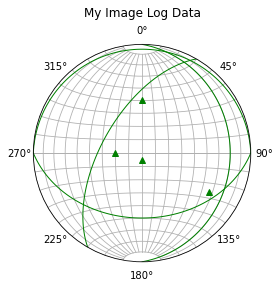

In [18]:
fig = plt.figure(figsize=(14,4)) 
ax = fig.add_subplot(1,1,1, projection= 'equal_area_stereonet')

# call the data from the Pandas dataframe above
strike = df.strike
dip = df.dip

ax.plane(strike, dip, 'g-', linewidth=1)
ax.pole(strike, dip, 'g^', markersize=6)

ax.grid()
    
ax.set_title('My Image Log Data',y=1.1)

plt.show() 